# Com S 574 - HW 2
## Miles Lucas

## Problem 2 - Linear Regression

What linear model would be a sutiable choice for modeling the following data

In [59]:
# Imports and Setup
library(ggplot2)
library(gridExtra)
library(lmtest)
library(lawstat)
# Set theme
theme_set(theme_bw())

In [60]:
filename <- "./data/HW2Q2.dat"
data <- read.table(filename, sep=' ', header=TRUE)

Let's start by plotting the raw data.

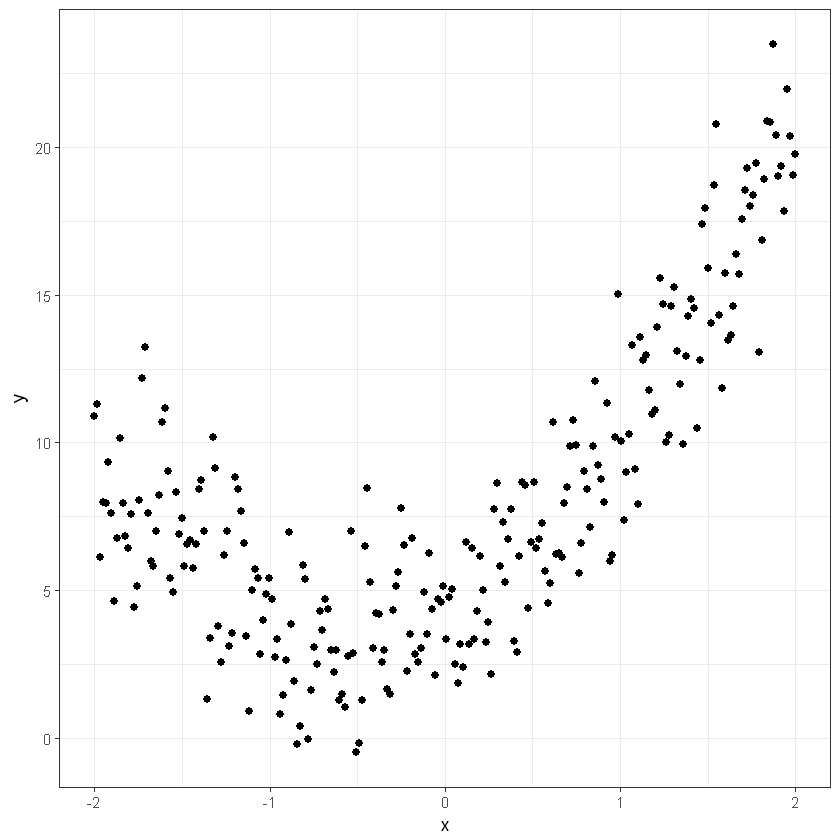

In [61]:
ggplot(data, aes(x=x, y=y)) + geom_point(cex=2)

The first thing I notice is that the data does not look linear. Looks are not the whole story though, so I will proceed doing the appropriate tests for my report.

### Doing the regression

I am using the GLM.jl package in Julia which allows very simple linear modelling (extremely similar to R). In the following I use a standard, ordinary least-squares model

\begin{equation}
    Y = \beta_0 + \beta_1 X + e_i
\end{equation}

Note that I am suppressing the output because I need to make some simple checks to see if doing OLS is even appropriate

In [62]:
ols = lm(y~1+x, data)

 ---
 Let's see what this looks like

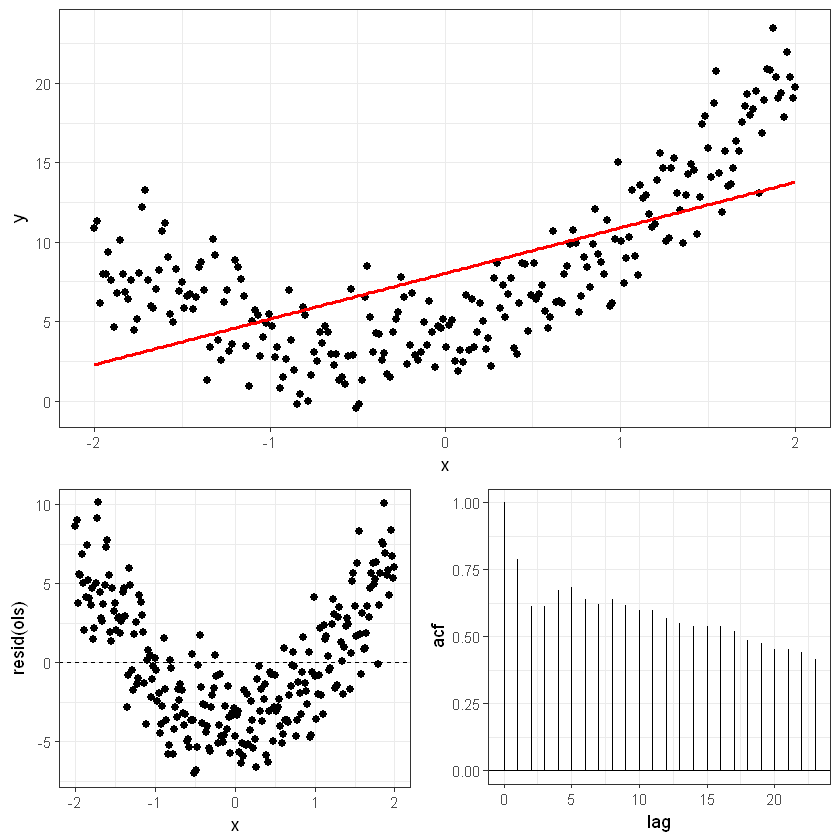

In [80]:
p1 <- ggplot(data, aes(x=x, y=y)) + geom_point(cex=2) + geom_line(aes(x=x, y=ols$fitted.values), cex=1, color=2)
p2 <- ggplot(data, aes(x=x, y=resid(ols))) + geom_point(cex=2) + geom_hline(yintercept=0, linetype='dashed')
bacf <- acf(resid(ols), plot = FALSE)
bacfdf <- with(bacf, data.frame(lag, acf))
p3 <- ggplot(data = bacfdf, mapping = aes(x = lag, y = acf)) +
       geom_hline(aes(yintercept = 0)) +
       geom_segment(mapping = aes(xend = lag, yend = 0))
grid.arrange(p1, p2, p3, heights=c(2, 1.5), layout_matrix=matrix(c(1, 2, 1, 3), 2, 2))

### Testing our initial assumptions

In order to perform ordinary least squares, I need to prove these assumptions are valid:

1. $\mathbb{E}(e_i)=0$
2. $\mathbb{V}(e_i)=\sigma^2_e$ (errors are constant, or homoscedastic)
3. $\text{cov}(e_i, e_j)=0 \quad \forall i\neq j$ (errors are uncorrelated)

I assert these assumptions by performing the following tests with significance level $\alpha$=0.05:

#### Run's Test

This will test if our errors are homoscedastic. I take a null hypothesis that the errors are homoscedastic with an alternative hypothesis that the errors are not homoscedastic. I call the `runs.test` from R, which works fine in Julia because Julia is a great programming language

In [14]:
runs.test(resid(ols))


	Runs Test - Two sided

data:  resid(ols)
Standardized Runs Statistic = -10.013, p-value < 2.2e-16


In [15]:
bptest(ols)


	studentized Breusch-Pagan test

data:  ols
BP = 0.26927, df = 1, p-value = 0.6038


Uh oh. The output of the runs test out my significance level means we reject the null-hypothesis. This implies that our errors are not random and we cannot trust our ordinary least-squares fit.